In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle
%matplotlib inline

In [2]:
testdata=pd.read_csv("test_lAUu6dG.csv")

In [3]:
data=pd.read_csv("train_ctrUa4K.csv")

In [4]:
data.shape

(614, 13)

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
data.isnull().values.any()                  

True

In [10]:
data.isnull().values.sum()                  

149

In [11]:
data.isnull().any()    

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [12]:
testdata.isnull().any()    

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [13]:
data=pd.DataFrame(data)
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [14]:
testdata=pd.DataFrame(testdata)
print(testdata)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
data.duplicated().sum()

0

In [17]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# DEALING WITH NULL VALUES# 

---



In [18]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)

In [19]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True )


In [20]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [21]:
 data['Married'].fillna(data['Married'].mode(), inplace=True )

In [22]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

In [23]:
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

In [24]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [25]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True )

In [26]:
data.isnull().any().sum()

1

TEST DATA MISSING VALUES

In [27]:
testdata['Credit_History'].fillna(testdata['Credit_History'].mean(), inplace=True)

In [28]:
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mean(), inplace=True)

In [29]:
testdata['LoanAmount'].fillna(testdata['LoanAmount'].median(), inplace=True )

In [30]:
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)

In [31]:
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)

In [32]:
 testdata['Married'].fillna(testdata['Married'].mode()[0], inplace=True )

In [33]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True )

In [34]:
testdata.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

In [35]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [36]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
367,LP002188,Male,No,0,Graduate,No,5124,0.0,124.0,342.0,0.0,Rural,N
160,LP001560,Male,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban,Y
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
246,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
332,LP002100,Male,No,0,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y


In [37]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


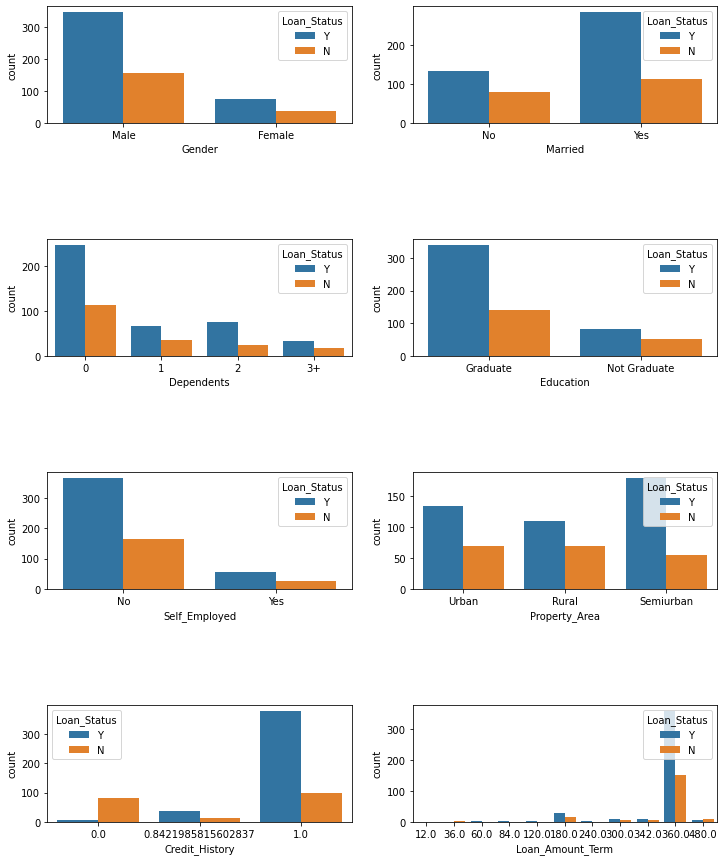

In [38]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [39]:
data.drop(['Dependents','Education','Self_Employed','CoapplicantIncome','Loan_Amount_Term', 'Property_Area'],axis=1,inplace=True)
print(data)

      Loan_ID  Gender Married  ApplicantIncome  LoanAmount  Credit_History  \
0    LP001002    Male      No             5849       128.0             1.0   
1    LP001003    Male     Yes             4583       128.0             1.0   
2    LP001005    Male     Yes             3000        66.0             1.0   
3    LP001006    Male     Yes             2583       120.0             1.0   
4    LP001008    Male      No             6000       141.0             1.0   
..        ...     ...     ...              ...         ...             ...   
609  LP002978  Female      No             2900        71.0             1.0   
610  LP002979    Male     Yes             4106        40.0             1.0   
611  LP002983    Male     Yes             8072       253.0             1.0   
612  LP002984    Male     Yes             7583       187.0             1.0   
613  LP002990  Female      No             4583       133.0             0.0   

    Loan_Status  
0             Y  
1             N  
2        

In [40]:
testdata.drop(['Dependents','Education','Self_Employed','CoapplicantIncome','Loan_Amount_Term', 'Property_Area'],axis=1,inplace=True)
print(testdata)

      Loan_ID Gender Married  ApplicantIncome  LoanAmount  Credit_History
0    LP001015   Male     Yes             5720       110.0        1.000000
1    LP001022   Male     Yes             3076       126.0        1.000000
2    LP001031   Male     Yes             5000       208.0        1.000000
3    LP001035   Male     Yes             2340       100.0        0.825444
4    LP001051   Male      No             3276        78.0        1.000000
..        ...    ...     ...              ...         ...             ...
362  LP002971   Male     Yes             4009       113.0        1.000000
363  LP002975   Male     Yes             4158       115.0        1.000000
364  LP002980   Male      No             3250       126.0        0.825444
365  LP002986   Male     Yes             5000       158.0        1.000000
366  LP002989   Male      No             9200        98.0        1.000000

[367 rows x 6 columns]


# ENCODING THE DATA

In [41]:
data_t=testdata.drop('Loan_ID', axis=1)

In [42]:
data.drop('Loan_ID', axis=1, inplace=True)

In [43]:
data_t= pd.get_dummies(data_t, drop_first=True)

In [44]:
data_t.sample(10)

,ApplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes
29,2942,125.0,1.000000,1,0
151,2783,113.0,1.000000,1,1
115,4243,157.0,0.825444,1,0
278,3634,176.0,0.000000,1,1
9,2400,123.0,1.000000,1,0
317,1700,67.0,0.000000,1,1
73,3900,232.0,1.000000,1,1
241,3887,105.0,0.000000,1,1
215,2914,150.0,1.000000,1,1
39,3643,138.0,1.000000,1,0


In [45]:
data= pd.get_dummies(data, drop_first=True)

In [46]:
data.sample(5)

,ApplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Loan_Status_Y
591,6000,205.0,1.0,1,1,0
329,2500,67.0,1.0,0,0,1
84,3988,50.0,1.0,1,1,1
282,2301,78.0,1.0,1,1,1
197,1907,120.0,1.0,0,0,1


# check for outliers

In [47]:
z = np.abs(stats.zscore(data)) #using it to fid the z score
print(z)


[[0.07299082 0.21124125 0.45164045 0.47234264 1.3574213  0.67451931]
 [0.13441195 0.21124125 0.45164045 0.47234264 0.73669096 1.48253724]
 [0.39374734 0.94899647 0.45164045 0.47234264 0.73669096 0.67451931]
 ...
 [0.43717437 1.27616847 0.45164045 0.47234264 0.73669096 0.67451931]
 [0.35706382 0.49081614 0.45164045 0.47234264 0.73669096 0.67451931]
 [0.13441195 0.15174486 2.41044061 2.11710719 1.3574213  1.48253724]]


In [48]:
zt = np.abs(stats.zscore(data_t)) #using it to fid the z score
print(zt)


[[0.1864605  0.42677996 0.47917989 0.48547939 0.75835829]
 [0.35269225 0.16395333 0.47917989 0.48547939 0.75835829]
 [0.0396413  1.18303317 0.47917989 0.48547939 0.75835829]
 ...
 [0.31721094 0.16395333 0.         0.48547939 1.31863792]
 [0.0396413  0.36169994 0.47917989 0.48547939 0.75835829]
 [0.89608667 0.62389994 0.47917989 0.48547939 1.31863792]]


In [49]:
threshold = 3
print(np.where(z > 3)) 

(array([126, 130, 155, 155, 171, 171, 177, 183, 185, 278, 308, 333, 333,
       369, 409, 432, 443, 487, 506, 523, 525, 561, 604], dtype=int64), array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1], dtype=int64))


In [50]:
#threshold = 3
#print(np.where(zt > 3)) 

C:\Users\yfird\Anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ApplicantIncome'>

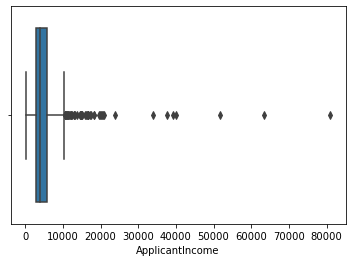

In [51]:
sns.boxplot(data["ApplicantIncome"])

C:\Users\yfird\Anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LoanAmount'>

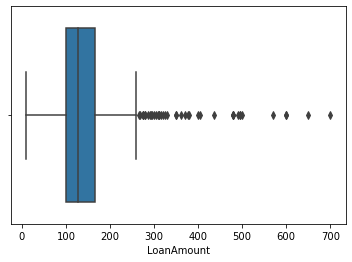

In [52]:
sns.boxplot(data["LoanAmount"])

In [53]:
data = data[(z < 3).all(axis=1)]
data.shape

(594, 6)

# HEAT MAP

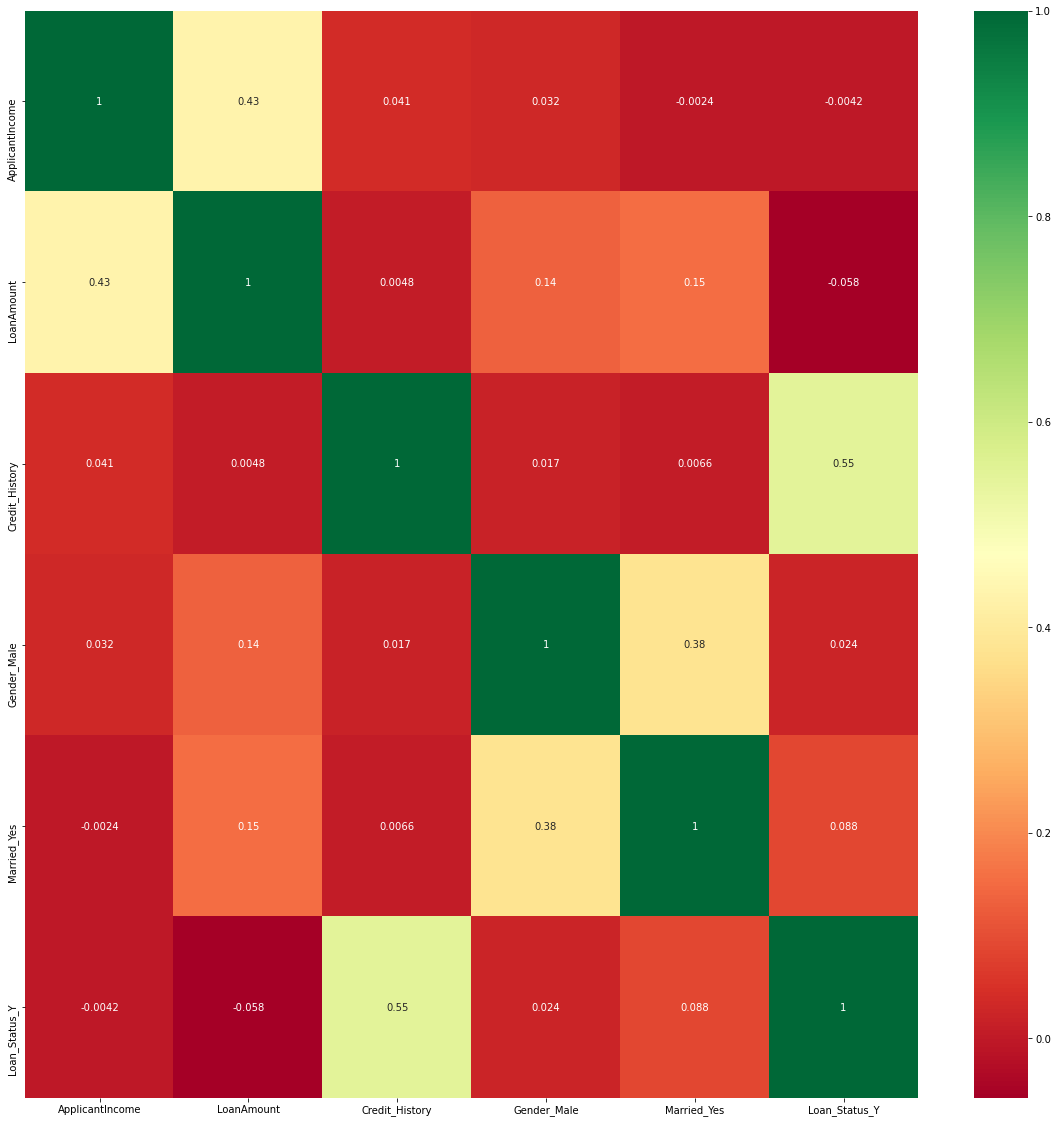

In [54]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [55]:
y=data['Loan_Status_Y']   #making y target
data =data.drop('Loan_Status_Y', axis = 1)  #removing y from table
x=data
x

,ApplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes
0,5849,128.0,1.0,1,0
1,4583,128.0,1.0,1,1
2,3000,66.0,1.0,1,1
3,2583,120.0,1.0,1,1
4,6000,141.0,1.0,1,0
...,...,...,...,...,...
609,2900,71.0,1.0,0,0
610,4106,40.0,1.0,1,1
611,8072,253.0,1.0,1,1
612,7583,187.0,1.0,1,1


In [56]:
y.shape


(594,)

In [57]:
x.shape


(594, 5)

# **FEATURE SCALING**

C:\Users\yfird\Anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yfird\Anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


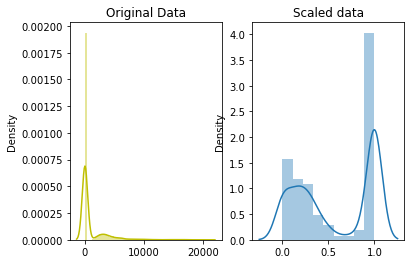

In [58]:
scaled_data = minmax_scale(data)
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [59]:
x=scaled_data

In [60]:
x

array([[0.27776965, 0.32075472, 1.        , 1.        , 0.        ],
       [0.21606473, 0.32075472, 1.        , 1.        , 1.        ],
       [0.1389092 , 0.15363881, 1.        , 1.        , 1.        ],
       ...,
       [0.38611883, 0.65768194, 1.        , 1.        , 1.        ],
       [0.36228493, 0.47978437, 1.        , 1.        , 1.        ],
       [0.21606473, 0.33423181, 0.        , 0.        , 0.        ]])

# **MODELLING**

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (415, 5) (415,)
Test set: (179, 5) (179,)


## **XGBOOST**

In [62]:
xgb = XGBClassifier(n_estimators=300,learning_rate=0.05, random_state=1, max_depth=4, gamma=1, colsample_bytree=0.3,subsample=0.8,reg_lambda=2)
xgb.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4,
              n_estimators=300, random_state=1, reg_lambda=2, subsample=0.8)

In [63]:
preds = xgb.predict(x_test)
xgb_ac=xgb.score(x_test, y_test)
print("Training Accuracy :", xgb.score(x_train, y_train))
print("Testing Accuracy :", xgb_ac)


print("Mean Absolute Error : " + str(mean_absolute_error(preds,y_test)))


Training Accuracy : 0.8313253012048193
Testing Accuracy : 0.7877094972067039
Mean Absolute Error : 52.71508379888268


              precision    recall  f1-score   support

           0       0.97      0.43      0.60        65
           1       0.75      0.99      0.86       114

    accuracy                           0.79       179
   macro avg       0.86      0.71      0.73       179
weighted avg       0.83      0.79      0.76       179



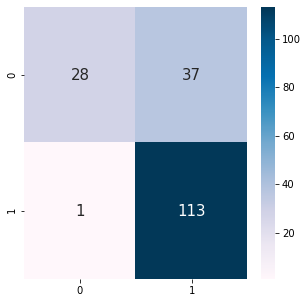

In [64]:
# cofusion matrix
cm = confusion_matrix(y_test, preds)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='g')

# classification report
cr = classification_report(y_test, preds)
print(cr)


In [65]:
pred_actual =pd.DataFrame({'predicted':preds, 'actual': y_test})
pred_actual

,predicted,actual
30,1,0
307,0,0
182,1,1
211,0,0
364,1,1
...,...,...
93,1,1
268,1,0
108,0,0
549,1,1


In [66]:
test_predictions = xgb.predict(data_t.values)#.....test test file

### **2.RANDOM FOREST CLASSIFIER**

Training Accuracy : 0.8385542168674699
Testing Accuracy : 0.7653631284916201
              precision    recall  f1-score   support

           0       0.85      0.43      0.57        65
           1       0.75      0.96      0.84       114

    accuracy                           0.77       179
   macro avg       0.80      0.69      0.70       179
weighted avg       0.78      0.77      0.74       179



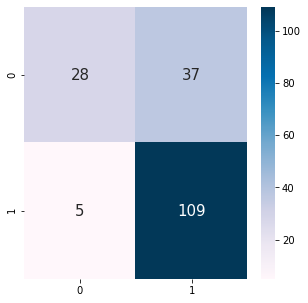

In [67]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth =4, random_state=42, min_samples_split = 5, oob_score = True, n_jobs = -1, max_features = "auto",criterion = 'entropy', max_leaf_nodes = 30,class_weight='balanced_subsample',min_samples_leaf = 10)
rfc.fit(x_train, y_train)
y_pred_quant = rfc.predict_proba(x_test)[:, 1]
y_preds = rfc.predict(x_test)
rfc_ac=rfc.score(x_test, y_test)
# evaluating the model
print("Training Accuracy :", rfc.score(x_train, y_train))
print("Testing Accuracy :", rfc_ac)



# cofusion matrix
cm = confusion_matrix(y_test, y_preds)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='g')

# classification report
cr = classification_report(y_test, y_preds)
print(cr)

In [68]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rfc, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.734


In [69]:
pred_actual =pd.DataFrame({'predicted':y_preds, 'actual': y_test})
pred_actual

,predicted,actual
30,1,0
307,0,0
182,0,1
211,0,0
364,1,1
...,...,...
93,1,1
268,1,0
108,0,0
549,1,1


In [70]:
predictions = rfc.predict(data_t.values)#.....test test file

### **ADABOOST**

In [71]:

from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=8, min_samples_leaf=10),n_estimators=500, random_state=3, learning_rate=0.001)
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         min_samples_leaf=10,
                                                         min_samples_split=8),
                   learning_rate=0.001, n_estimators=500, random_state=3)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=cv)

In [73]:
search.fit(x,y)
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [74]:

from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ada, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.795 (0.046)


In [75]:
adapred = ada.predict(x_test)
ada_ac=ada.score(x_test,y_test)

# evaluating the model
print (f'Train Accuracy - : {ada.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(x_test,y_test):.3f}')

Train Accuracy - : 0.846
Test Accuracy - : 0.760


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,adapred))

              precision    recall  f1-score   support

           0       0.87      0.40      0.55        65
           1       0.74      0.96      0.84       114

    accuracy                           0.76       179
   macro avg       0.80      0.68      0.69       179
weighted avg       0.78      0.76      0.73       179



<AxesSubplot:>

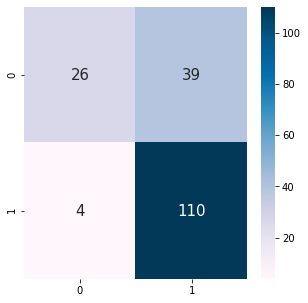

In [77]:
# cofusion matrix
cm = confusion_matrix(y_test, adapred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='g')

In [78]:
pred_actual =pd.DataFrame({'predicted':preds, 'actual': y_test})
pred_actual

,predicted,actual
30,1,0
307,0,0
182,1,1
211,0,0
364,1,1
...,...,...
93,1,1
268,1,0
108,0,0
549,1,1


In [79]:
predict = ada.predict(data_t.values)

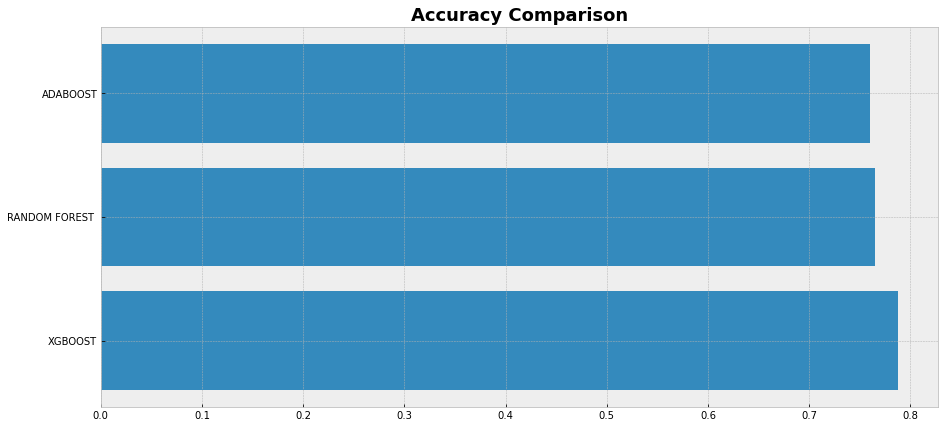

In [80]:
names=[]
names.append('XGBOOST')
names.append('RANDOM FOREST ')
names.append('ADABOOST')
results=[]
results.append(xgb_ac)
results.append(rfc_ac)
results.append(ada_ac)

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('bmh') #style
plt.barh(names,results)
plt.title("Accuracy Comparison",  weight='bold', size=18)
sns.set_context('poster') #everything is larger..for smaller use paper, for presentation use talk
plt.Xlabel=results
plt.ylabel=names 
plt.show()

In [81]:
pickle.dump(xgb,open ('loanmodel.pkl','wb'))

In [82]:
model=pickle.load(open ('loanmodel.pkl','rb'))
model

XGBClassifier(colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4,
              missing=nan, n_estimators=300, random_state=1, reg_lambda=2,
              subsample=0.8)

In [83]:
result = model.score(x_test, y_test)
print(result)

0.7877094972067039
